In [1]:
path_data = '../../../assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# The Monty Hall Problem
This [problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) has flummoxed many people over the years, [mathematicians included](https://web.archive.org/web/20140413131827/http://www.decisionsciences.org/DecisionLine/Vol30/30_1/vazs30_1.pdf). Let's see if we can work it out by simulation.

The setting is derived from a television game show called "Let's Make a Deal". Monty Hall hosted this show in the 1960's, and it has since led to a number of spin-offs. An exciting part of the show was that while the contestants had the chance to win great prizes, they might instead end up with "zonks" that were less desirable. This is the basis for what is now known as *the Monty Hall problem*.

The setting is a game show in which the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn't know where the car is, and has to attempt to find it under the following rules.

- The contestant makes an initial choice, but that door isn't opened.
- At least one of the other two doors must have a goat behind it. Monty opens one of these doors to reveal a goat, displayed in all its glory in [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem):

![Monty Hall goat](../../../images/monty_hall_goat.png)

- There are two doors left, one of which was the contestant's original choice. One of the doors has the car behind it, and the other one has a goat. The contestant now gets to choose which of the two doors to open.

The contestant has a decision to make. Which door should she choose to open, if she wants the car? Should she stick with her initial choice, or switch to the other door? That is the Monty Hall problem.

## The Solution

In any problem involving chances, the assumptions about randomness are important. It's reasonable to assume that there is a 1/3 chance that the contestant's initial choice is the door that has the car behind it. 

The solution to the problem is quite straightforward under this assumption, though the straightforward solution doesn't convince everyone. Here it is anyway.

- The chance that the car is behind the originally chosen door is 1/3.
- The car is behind either the originally chosen door or the door that remains. It can't be anywhere else.
- Therefore, the chance that the car is behind the door that remains is 2/3.
- Therefore, the contestant should switch.

That's it. End of story. 

Not convinced? Then let's simulate the game and see how the results turn out.

## Simulation ##
The simulation will be more complex that those we have done so far. Let's break it down.

### Step 1: What to Simulate ###
For each play we will simulate what's behind all three doors:
- the one the contestant first picks
- the one that Monty opens
- the remaining door

So we will be keeping track of three quantitites, not just one.

### Step 2: Simulating One Play ###
The bulk of our work consists of simulating one play of the game. This involves several pieces.

#### The Goats
We start by setting up an array `goats` that contains unimaginative names for the two goats.

In [2]:
goats = np.array(['first goat', 'second goat'])

To help Monty conduct the game, we are going to have to identify which goat is selected and which one is revealed behind the open door. The function `other_goat` takes one goat and returns the other.

In [3]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

Let's confirm that the function works.

In [4]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

The string `'watermelon'` is not the name of one of the goats, so when `'watermelon'` is the input then `other_goat` does nothing.

#### The Options
The array `hidden_behind_doors` contains the set of things that could be behind the doors.

In [15]:
hidden_behind_doors = np.array(['car', 'first goat', 'second goat'])

We are now ready to simulate one play. To do this, we will define a function `monty_hall_game` that takes no arguments. When the function is called, it plays Monty's game once and returns a list consisting of:

- the contestant's guess
- what Monty reveals when he opens a door
- what remains behind the other door

The game starts with the contestant choosing one door at random. In doing so, the contestant makes a random choice from among the car, the first goat, and the second goat.

If the contestant happens to pick one of the goats, then the other goat is revealed and the car is behind the remaining door.

If the contestant happens to pick the car, then Monty reveals one of the goats and the other goat is behind the remaining door.

In [24]:
def monty_hall_game():
    """
    Return 
    [
      contestant's guess, 
      what Monty reveals, 
      what remains behind the other door
    ]
    """
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    if contestant_guess == 'first goat':
        return {
            "Guess": contestant_guess, 
            "Revealed": 'second goat', 
            "Remaining": 'car'
        }
    if contestant_guess == 'second goat':
        return {
            "Guess": contestant_guess, 
            "Revealed": 'first goat', 
            "Remaining": 'car'
        }
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return {
            "Guess": contestant_guess, 
            "Revealed": revealed, 
            "Remaining": other_goat(revealed)
        }

Let's play! Run the cell several times and see how the results change.

In [25]:
monty_hall_game()

{'Guess': 'first goat', 'Revealed': 'second goat', 'Remaining': 'car'}

### Step 3: Number of Repetitions ###
To gauge the frequency with which the different results occur, we have to play the game many times and collect the results. Let's run 10,000 repetitions.

### Step 4: Coding the Simulation ###
It's time to run the whole simulation. 

We will play the game 10,000 times and collect the results in a table. Each row of the table will contain the result of one play. 

One way to grow a table by adding a new row is to use the `append` method. If `my_table` is a table and `new_row` is a list containing the entries in a new row, then `my_table.append(new_row)` adds the new row to the bottom of `my_table`. 

Note that `append` does not create a new table. It changes `my_table` to have one more row than it did before.

First let's create a table `games` that has three empty columns. We can do this by just specifying a list of the column labels, as follows.

In [26]:
import pandas as pd
games = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'])

Notice that we have chosen the order of the columns to be the same as the order in which `monty_hall_game` returns the result of one game.

Now we can add 10,000 rows to `trials`. Each row will represent the result of one play of Monty's game.

In [28]:
# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games = games.append(monty_hall_game(), ignore_index=True)

In [29]:
games

,Guess,Revealed,Remaining
0,first goat,second goat,car
1,second goat,first goat,car
2,second goat,first goat,car
3,first goat,second goat,car
4,first goat,second goat,car
...,...,...,...
9995,second goat,first goat,car
9996,first goat,second goat,car
9997,first goat,second goat,car
9998,second goat,first goat,car


The simulation is done. Notice how short the code is. The majority of the work was done in simulating the outcome of one game.

## Visualization

To see whether the contestant should stick with her original choice or switch, let's see how frequently the car is behind each of her two options.

In [35]:
original_choice = games.groupby('Guess')
original_choice["Guess"].count()

Guess
car            3280
first goat     3311
second goat    3409
Name: Guess, dtype: int64

In [36]:
remaining_door = games.groupby('Remaining')
remaining_door["Remaining"].count()

Remaining
car            6720
first goat     1660
second goat    1620
Name: Remaining, dtype: int64

As our earlier solution said, the car is behind the remaining door two-thirds of the time, to a pretty good approximation. The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.

To see this graphically, we can join the two tables above and draw overlaid bar charts.

In [44]:
original_choice.count()

,Revealed,Remaining
Guess,,
car,3280,3280
first goat,3311,3311
second goat,3409,3409


<AxesSubplot:>

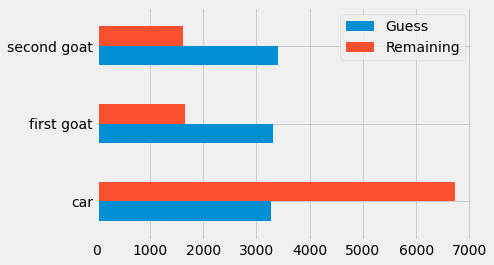

In [83]:
df = pd.DataFrame()

df = df.append(games["Guess"].value_counts())
df = df.append(games["Remaining"].value_counts())
df.T.plot.barh()

Notice how the three blue bars are almost equal – the original choice is equally likely to be any of the three available items. But the red bar corresponding to `Car` is twice as long as the blue. 

The simulation confirms that the contestant is twice as likely to win if she switches.